##Downloading and Importing dependencies##

In [164]:
! pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
! pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [168]:
!apt install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [169]:
import cv2
from PIL import Image
import pytesseract
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


##Mounting My Google drive##

In [170]:
import numpy as np

In [171]:
#Mounting MyDrive to upload Images
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Upload all seven images##

In [172]:
#Upload images by their paths
img0="/content/0.jpg"
img1="/content/1.jpg"
img2="/content/2.jpg"
img3="/content/3.jpg"
img4="/content/4.jpg"
img5="/content/5.jpg"
img6="/content/6.jpg"

# ROI(Region of Interest)

In [173]:
import cv2

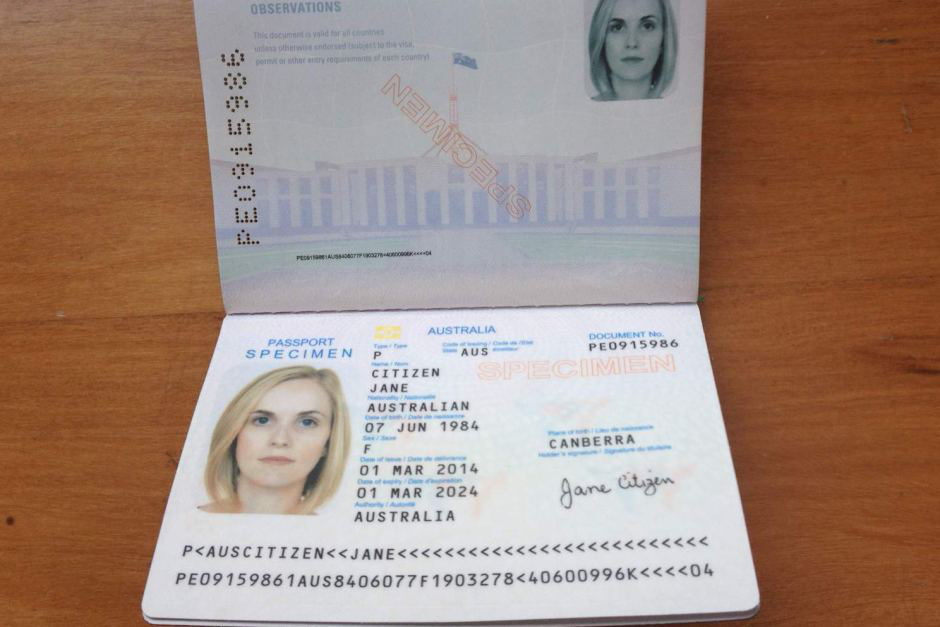

In [174]:
img0 = Image.open("/content/0.jpg")
img0.show()

# Convert PIL Image to OpenCV BGR format
img0_bgr = cv2.cvtColor(np.array(img0), cv2.COLOR_RGB2BGR)



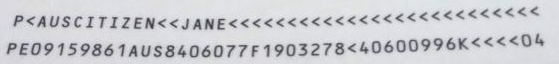

In [175]:
# Define ROI coordinates
x = 169
y = 530
width = 728 - x
height = 594 - y
# Crop the ROI
roi_0 = img0_bgr[y:y+height, x:x+width]
# Display the cropped ROI
cv2_imshow(roi_0)

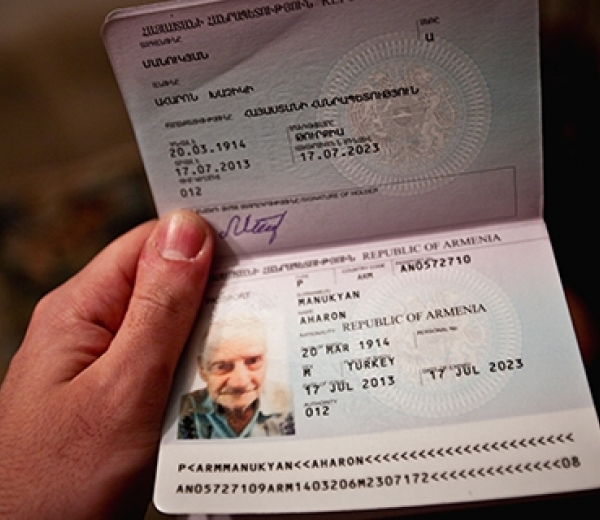

In [176]:
img1 = Image.open("/content/1.jpg")
img1.show()

# Convert PIL Image to OpenCV BGR format
img1_bgr = cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR)

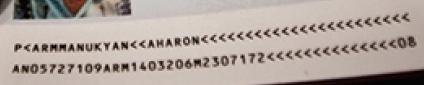

In [177]:
# Define ROI coordinates
x = 164
y = 420
width = 588 - x
height = 505 - y

# Crop the ROI
roi_1= img1_bgr[y:y+height, x:x+width]

# Display the cropped ROI
cv2_imshow(roi_1)

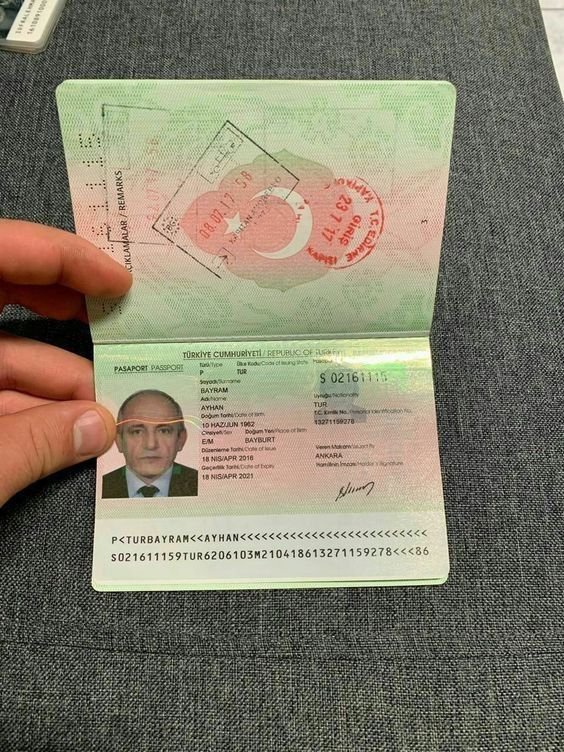

In [178]:
img2 = Image.open("/content/2.jpg")
img2.show()

# Convert PIL Image to OpenCV BGR format
img2_bgr = cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2BGR)



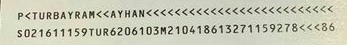

In [179]:
# Define ROI coordinates
x = 94
y = 524
width = 441 - x
height = 569 - y

# Crop the ROI
roi_2 = img2_bgr[y:y+height, x:x+width]

# Display the cropped ROI
cv2_imshow(roi_2)

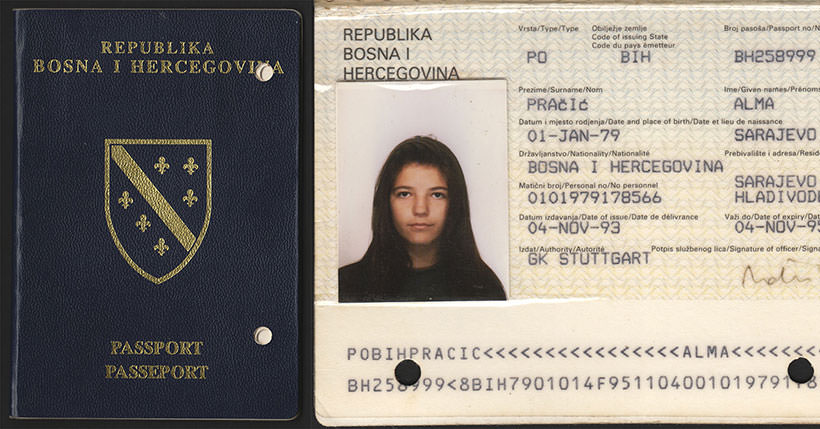

In [180]:
img3 = Image.open("/content/3.jpg")
img3.show()

# Convert PIL Image to OpenCV BGR format
img3_bgr = cv2.cvtColor(np.array(img3), cv2.COLOR_RGB2BGR)



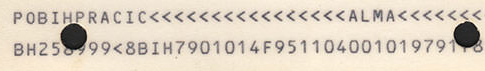

In [181]:
# Define ROI coordinates
x = 334
y = 336
width = 819 - x
height = 407 - y

# Crop the ROI
roi_3 = img3_bgr[y:y+height, x:x+width]

# Display the cropped ROI
cv2_imshow(roi_3)

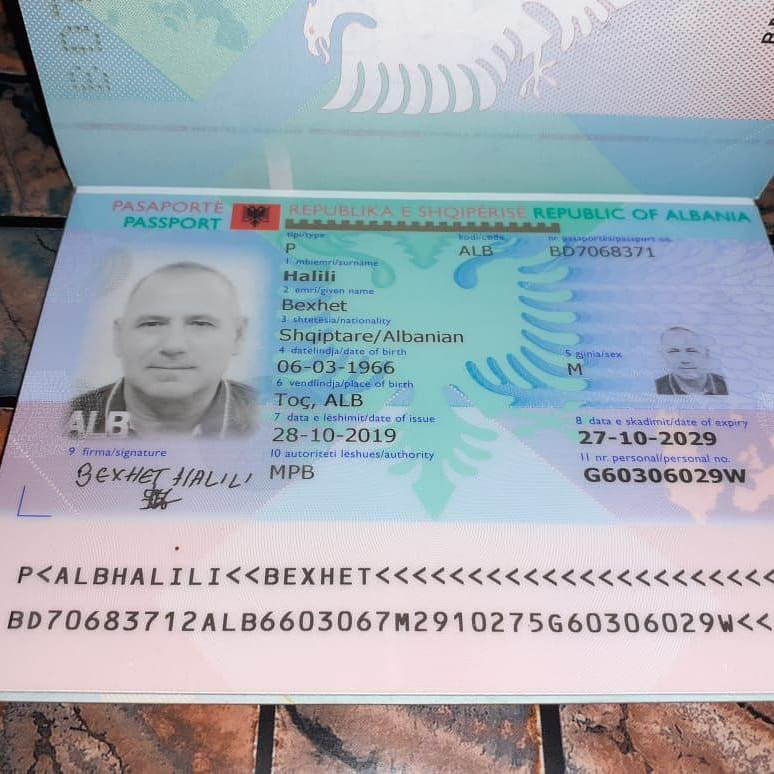

In [182]:
img4 = Image.open("/content/4.jpg")
img4.show()

# Convert PIL Image to OpenCV BGR format
img4_bgr = cv2.cvtColor(np.array(img4), cv2.COLOR_RGB2BGR)



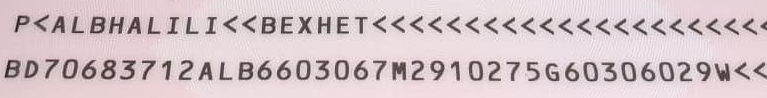

In [183]:
# Define ROI coordinates
x = 3
y = 551
width = 770 - x
height = 649 - y

# Crop the ROI
roi_4 = img4_bgr[y:y+height, x:x+width]

# Display the cropped ROI
cv2_imshow(roi_4)

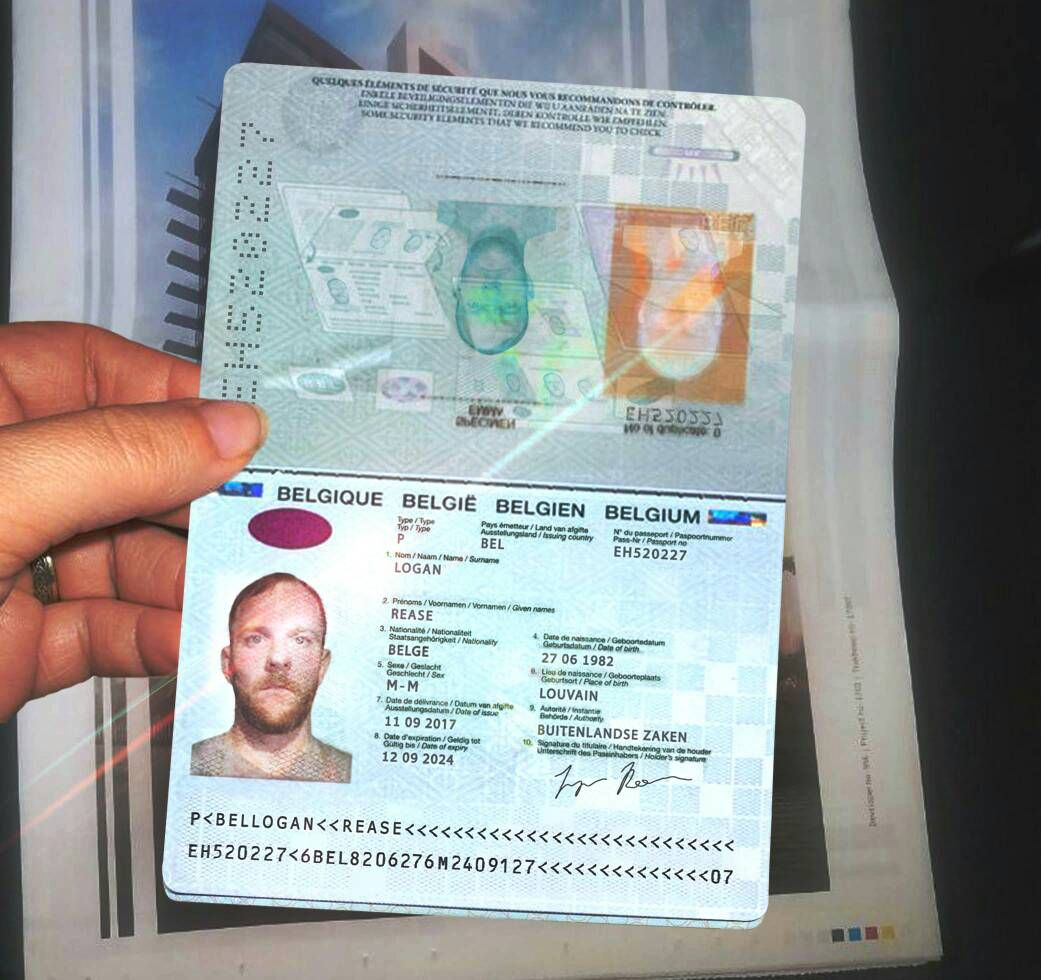

In [184]:
img5 = Image.open("/content/5.jpg")
img5.show()

# Convert PIL Image to OpenCV BGR format
img0_bgr = cv2.cvtColor(np.array(img5), cv2.COLOR_RGB2BGR)



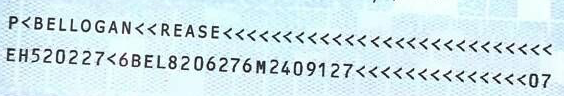

In [185]:
# Define ROI coordinates
x = 182
y = 796
width = 746- x
height =892 - y

# Crop the ROI
roi_5 = img0_bgr[y:y+height, x:x+width]

# Display the cropped ROI
cv2_imshow(roi_5)

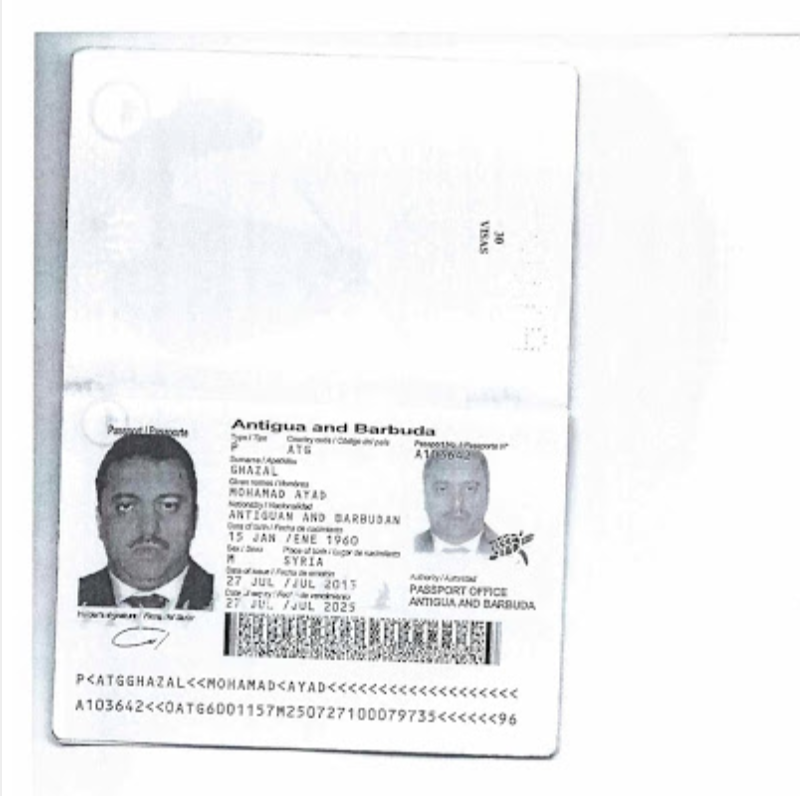

In [186]:
img6 = Image.open("/content/6.png")
img6.show()

# Convert PIL Image to OpenCV BGR format
img6_bgr = cv2.cvtColor(np.array(img6), cv2.COLOR_RGB2BGR)



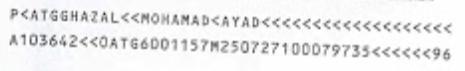

In [187]:
# Define ROI coordinates
x = 66
y = 665
width = 531- x
height = 736- y

# Crop the ROI
roi_6= img6_bgr[y:y+height, x:x+width]

# Display the cropped ROI
cv2_imshow(roi_6)

# Extract MRZ with EasyOCR

In [188]:
import cv2
import easyocr

def extract_mrz(image, output_path):
    # Upscale the image if desired
    upscale_factor = 10  # Adjust the upscale factor as needed
    upscaled_image = cv2.resize(image, None, fx=upscale_factor, fy=upscale_factor)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(upscaled_image, cv2.COLOR_BGR2GRAY)



    # Perform OCR using EasyOCR
    reader = easyocr.Reader(['en'])
    mrz_lines = reader.readtext(gray_image)



    # Print the MRZ lines
    print("Extracted MRZ lines:")
    for result in mrz_lines:
        line_text = result[1]  # Extract the text from the result
        print(line_text)

    # Save the MRZ lines to a text file
    with open(output_path, 'w') as file:
        for result in mrz_lines:
            line_text = result[1]  # Extract the text from the result
            file.write(line_text + '\n')

    print("MRZ extracted and saved to", output_path)


In [189]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mrz.txt'
# Call the extract_mrz function
extract_mrz(roi_0, output_path)

Extracted MRZ lines:
P<AUSCITIZEN<<JANE<<<<<<<<<<<<<<<<<<<<<<<<< <
PE09159861A058406077f1903278<40600996k<<<<04
MRZ extracted and saved to /content/drive/MyDrive/images/mrz.txt


In [190]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mrz1.txt'
# Call the extract_mrz function
extract_mrz(roi_1, output_path)

Extracted MRZ lines:
S
MRZ extracted and saved to /content/drive/MyDrive/images/mrz1.txt


In [191]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mrz2.txt'
# Call the extract_mrz function
extract_mrz(roi_2, output_path)

Extracted MRZ lines:
P<turbAYRam<<ayhan<<<<<<<<<<<<<<<<<<<<<<<<<<
5021611159TUR62061030210418613271159278<<<86
MRZ extracted and saved to /content/drive/MyDrive/images/mrz2.txt


In [192]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mrz3.txt'
# Call the extract_mrz function
extract_mrz(roi_3, output_path)

Extracted MRZ lines:
POBIHPRACIC<<<<<<<<<<<<<<K<ALMA<<<<<< <
BH25e
99<8B147901014F951104001019791
MRZ extracted and saved to /content/drive/MyDrive/images/mrz3.txt


In [193]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mr4.txt'
# Call the extract_mrz function
extract_mrz(roi_4, output_path)

Extracted MRZ lines:
P<ALBHALILI<<BEXHET<<<<<<<<<<<<<<<<4444< 6
BD706837124LB660306702910275660306029w<<
MRZ extracted and saved to /content/drive/MyDrive/images/mr4.txt


In [194]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mrz5.txt'
# Call the extract_mrz function
extract_mrz(roi_5, output_path)

Extracted MRZ lines:
P<BELLOGAN<<REASE 
<<<<<<<<<<<<<<<<<<<<<<<<<<<
EH520227<68EL820627602409127<<<<<<<<<<<<<<d7
MRZ extracted and saved to /content/drive/MyDrive/images/mrz5.txt


In [195]:
# Provide the image path and output path
output_path = '/content/drive/MyDrive/images/mrz6.txt'
# Call the extract_mrz function
extract_mrz(roi_6, output_path)

Extracted MRZ lines:
P<atsehazal<<nomanadgayadskkkkkg<<<<<<<<<<<<
^103662<<jaT66d011570250727100079738<<<<<<96
MRZ extracted and saved to /content/drive/MyDrive/images/mrz6.txt


# Extract MRZ OCR Tesseract

In [230]:
import cv2
import pytesseract
from pytesseract import Output

def perform_ocr(roi_0):



    # Convert to grayscale for further processing
    gray = cv2.cvtColor(roi_0, cv2.COLOR_BGR2GRAY)

    # Get rid of noise with Gaussian Blur filter
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect white regions
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    dilated = cv2.dilate(blurred, rectKernel)

    # Detect all contours in Canny-edged image
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = cv2.drawContours(roi_0.copy(), contours, -1, (0, 255, 0), 3)

    # Perform OCR and get the text box coordinates
    d = pytesseract.image_to_data(image_with_contours, output_type=Output.DICT)
    n_boxes = len(d['level'])
    boxes = cv2.cvtColor(image_with_contours.copy(), cv2.COLOR_BGR2RGB)

    # Draw rectangles around the text boxes
    for i in range(n_boxes):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Extract text using Tesseract OCR
    extracted_text = pytesseract.image_to_string(boxes)
    plot_rgb(boxes)
    print(extracted_text)



P<AUSCITIZEN<<JANE<<<<<<< GeQkececey << 4 K<<<di

PEUS15984/1AUS8406077F| h903278<4060099OK< << <0



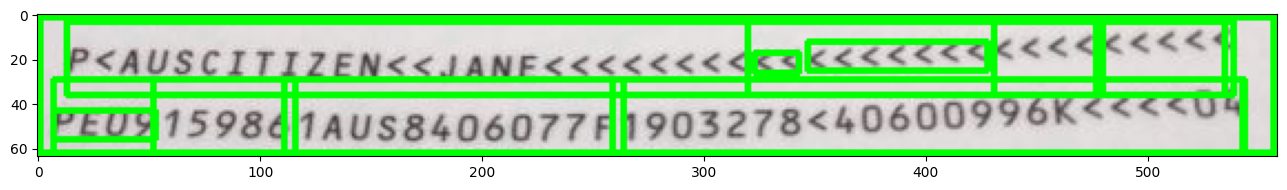

In [231]:
# Usage example:
perform_ocr(roi_0)  # Replace "your_image.jpg" with the path to your image


WvOS727:109ARM1403206R2 507/11

 

 

 

gene eneeeee—
STB

pee

—_cammmmmmeem,



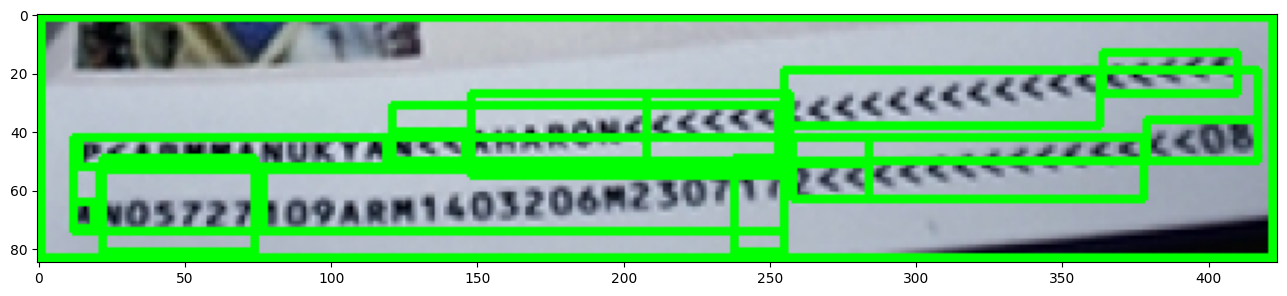

In [232]:
# Usage example:
perform_ocr(roi_1)  # Replace "your_image.jpg" with the path to your image


FT URBAWRAM<<A YAN @OqeMesR SES PE Sea < |<< GG
En21611159TuRez0e1OsMet0ateoise/tiover omen)



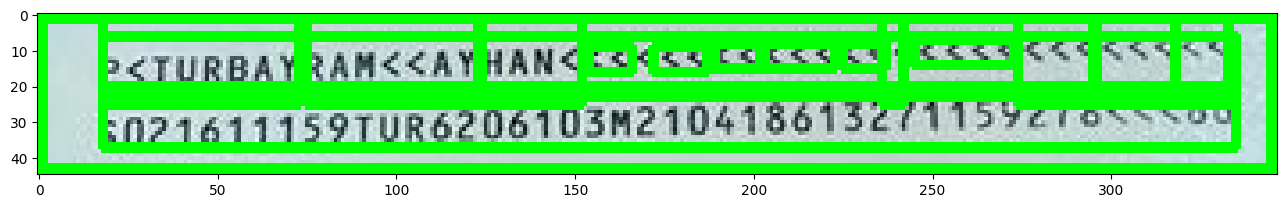

In [233]:
# Usage example:
perform_ocr(roi_2)  # Replace "your_image.jpg" with the path to your image


POBLHP RATICSRSSRSSIRSESSIK< SALMA SESE

BH25e" 9B<Ho 1H? OOO TSF 99 TIUSUUTUTITY



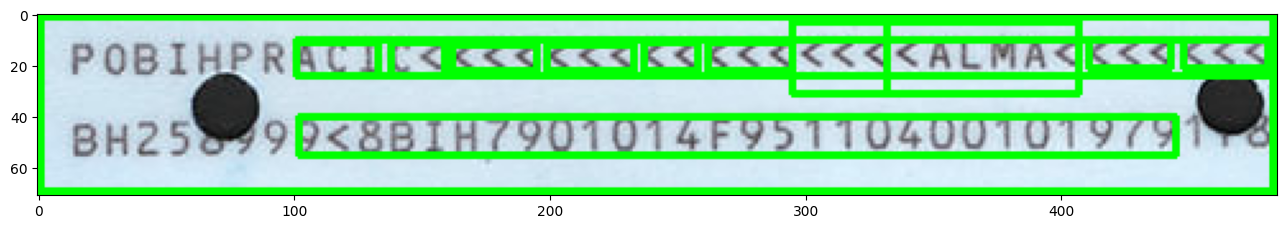

In [234]:
# Usage example:
perform_ocr(roi_3)  # Replace "your_image.jpg" with the path to your image


P<ALBHALILI<<BEXHE T<<<<<<<<<eeeeeeeeeeed
BDI70683712ALB6603067M2910275G60306029W<4



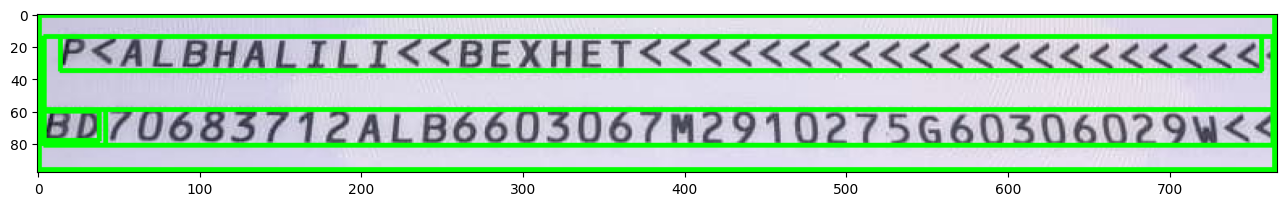

In [235]:
# Usage example:
perform_ocr(roi_4)  # Replace "your_image.jpg" with the path to your image


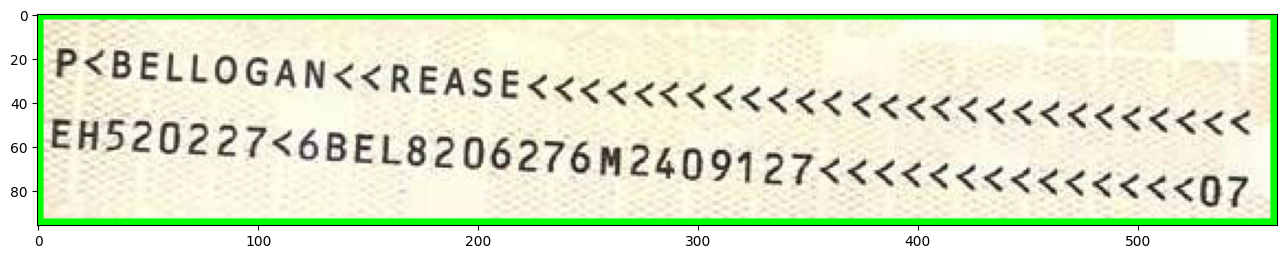

In [236]:
# Usage example:
perform_ocr(roi_5)  # Replace "your_image.jpg" with the path to your image


FEATHEHAZALE<MOMAMAD<AYAD<<ceeccceecccececed
pp TUS ONESSUATGSODITB7MZ50727 4 POOT9735<<<<ccod



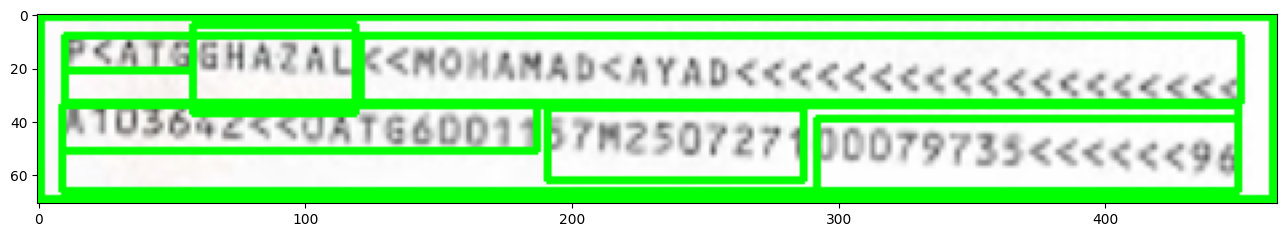

In [237]:
# Usage example:
perform_ocr(roi_6)  # Replace "your_image.jpg" with the path to your image
